The data set given for the project is from " https://archive-beta.ics.uci.edu/ml/datasets/productivity+prediction+of+garment+employees " 
and is cited as Productivity Prediction of Garment Employees. (2020). UCI Machine Learning Repository. 
The data file is attached as csv file. The following are details being provided . The data contains details on actual productivty of a garment industry, the data has been recorded on a day to day basis from the year 2015 to almost year end of 2015. The data set at first needs to be examined and the structure of the data set needs to be understood. The data has been recorded in terms of the following details
Date 
Quarter (Four Quarters)
Department (Sewing and Finishing)
Day (Please note the way data is recorded is that based on a dept and productivity is recorded for various lines in each dept, hence you would find multiple productivity recorded for each combination of vairables such as team, dept, smv, date)
Team 
Targeted_Producitivity (Target which needs to be achieved)
SMV (Standard Minute Value) : Standard time for a Task in this case you can take standard time to complete a garment 
WIP (Work in progress)
Over_time
Incentive 
Idle_time
Idle_men (Idle workers)
no_of_style_change
no_of_workers
Actual_Producitivity

The aim is of this project is to obtain an understanding of the data and decipher the relationship among the variables, understanding what possible variables can affect producivity which can be whether overtime or team size or number of worker or department type or a day (like monday ect...) ect.. have an effect. 

Suppose the manager is interested in the following questions 

Exploratory Data Analysis & Descriptive Statistics 

1. Basic Summary statistics of the data for the numerical variables 
2. basic Summary of the data for the number of working days, count of quarters in the year
3. Mean and standard deviation of actual producivity for every quarter and Histogram plot of actual productivity based on every quarter and conclusion accordingly
4. Number count for sewing and finishing department 
5. Mean and standard deviation of actual producivity for sewing and finishing Histogram plot of actual productivity based on both department and conclusion accordingly
6. Number count for  teams, smv across the year
7. Histogram & Box plot of actual productivity based on all working days, team size, quarterts and  Conclude accordingly 
8. Find correlation matrix and draw heat map for all variables
9. Conclude (Is the company able to meet target, are they giving incentives based on producitivity, does overtime have any effect on productivity)
10. Find the correlation between actual and target productivity for every quarter and for every department. What do you conclude
11. Based on the above details of EDA and Descriptive statisitcs analysis what would you say could be the possible factors which can affect producitivity. 

Hypothesis Testing 

12. Test using Z test (take a random sample of more than 30 and assume sigma =.1) whether the finishing department has achieved more acheived producitivity than .75 for a standard deviation of .1. State your null and alternative hypothesis. alpha value is .05

13. Test using Z test(take a random sample of more than 30 and assume sigma =.1) whether the sewing department has achieved more producitivit than .75 for a standard deviation of .1. State your null and alternative hypothesis. alpha value is .05.

14. Conduct a two sample t test (take a random sample more than 30) to check whether the finishing department has achieved more actual productivtiy than sewing     department. State your null and alternative hypothesis 

15. Conduct a two sample t (take a random sample less than 30) test to check whether the finishing department has achieved obtained higher incentive than sewing department, state your null and alternative hypothesis. In case test fails for normality check, then take a sample more than 30. 

16. The manager has asked you to classifiy low productivity as less than .5, medium between .5 and less than .75 and higher
    as greater than or equal to .75. He believes that the percentage of  actual producvity  in  sewing departemnt for   
    person classified as low is 30%, for medium is 40% and for high is 30%. USing chi square test can you prove whether his 
    hypothesis is right or not 

17. Based on the EDA analysis the manager has decided to find out whether different quarters are having an impact on actual productivity. Assuming normality of data conduct an analysis accordingly Conduct an ANOVA for comparing productivity for Quarter1, Quarter2, Quarter3, Quarter 4 and accordingly conclude (Assume data is normally distributed)

18. Based on the EDA analysis the manager has decided to find out whether different days  are having an impact on actual productivity. Assuming normality of data conduct an analysis accordingly Conduct an ANOVA for comparing productivity for Quarter1, Quarter2, Quarter3, Quarter 4 and accordingly conclude (Assume data is normally distributed)

19. In case the manager is interested whether day and quarters have an impact on actual producitivity, provide an analysis and identify which factors play a role in affecting productivty

20. Based on 17 eliminate one of the variabes which is not significant and reconduct analysis using deparment as another variable, what do you conclude.

21. Based on EDA and Hypothesis would you aggree or disaggree with the finding, also in addition summarize the findings based on both analysis and provide a recommendation on what you can thinking on improving the producitivity. 



In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import f_oneway
# import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
# import the functions to perform Chi-square tests
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare

Exploratory Data Analysis & Descriptive Statistics 

1. Basic Summary statistics of the data for the numerical variables 
2. basic Summary of the data for the number of working days, count of quarters in the year
3. Mean and standard deviation of actual producivity for every quarter and Histogram plot of actual productivity based on every quarter and conclusion accordingly
4. Number count for sewing and finishing department 
5. Mean and standard deviation of actual producivity for sewing and finishing Histogram plot of actual productivity based on both department and conclusion accordingly
6. Number count for  teams, smv across the year
7. Histogram & Box plot of actual productivity based on all working days, team size, quarterts and  Conclude accordingly 
8. Find correlation matrix and draw heat map for all variables
9. Conclude (Is the company able to meet target, are they giving incentives based on producitivity, does overtime have any effect on productivity)
10. Find the correlation between actual and target productivity for every quarter and for every department. What do you conclude
11. Based on the above details of EDA and Descriptive statisitcs analysis what would you say could be the possible factors which can affect producitivity. 

In [6]:
#1Basic Summary statistics of the data for the numerical variables
df=pd.read_csv('garments_worker_productivity.csv')
df


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,01-01-2015,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,01-01-2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,01-01-2015,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,01-01-2015,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,01-01-2015,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,03-11-2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,03-11-2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,03-11-2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,03-11-2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [18]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [19]:
#2basic Summary of the data for the number of working days, count of quarters in the year
working_days_summary = df['day'].describe()
print("Working Days Summary:")
print(working_days_summary)

# Count of quarters in the year
quarters_count = df['quarter'].nunique()
print("Count of Quarters in the Year:", quarters_count)

Working Days Summary:
count          1197
unique            6
top       Wednesday
freq            208
Name: day, dtype: object
Count of Quarters in the Year: 5


Mean and Standard Deviation of Actual Productivity for Every Quarter:
              mean       std
quarter                     
Quarter1  0.751560  0.161318
Quarter2  0.743710  0.171114
Quarter3  0.704759  0.175614
Quarter4  0.709067  0.185983
Quarter5  0.826177  0.183851


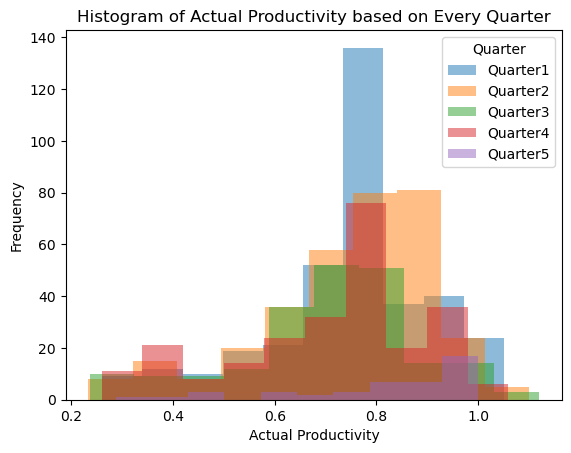

In [21]:
#3Mean and standard deviation of actual producivity for every quarter and Histogram
#plot of actual productivity based on every quarter and conclusion accordingly
quarter_stats = df.groupby('quarter')['actual_productivity'].agg(['mean', 'std'])
print("Mean and Standard Deviation of Actual Productivity for Every Quarter:")
print(quarter_stats)

# Create a histogram plot based on actual productivity for each quarter
quarters = df['quarter'].unique()
for quarter in quarters:
    quarter_data = df[df['quarter'] == quarter]
    plt.hist(quarter_data['actual_productivity'], bins=10, alpha=0.5, label=quarter)

plt.xlabel('Actual Productivity')
plt.ylabel('Frequency')
plt.legend(title='Quarter')
plt.title('Histogram of Actual Productivity based on Every Quarter')
plt.show()

In [22]:
#4 Number count for sewing and finishing department
sewing_count = df[df['department'] == 'sewing'].shape[0]
finishing_count = df[df['department'] == 'finishing'].shape[0]

print("Number of occurrences for Sewing Department:", sewing_count)
print("Number of occurrences for Finishing Department:", finishing_count)

Number of occurrences for Sewing Department: 691
Number of occurrences for Finishing Department: 506


Mean of Actual Productivity for Sewing Department: 0.7220130317105636
Standard Deviation of Actual Productivity for Sewing Department: 0.15478432010106702
Mean of Actual Productivity for Finishing Department: 0.752950668324111
Standard Deviation of Actual Productivity for Finishing Department: 0.19702098306497745


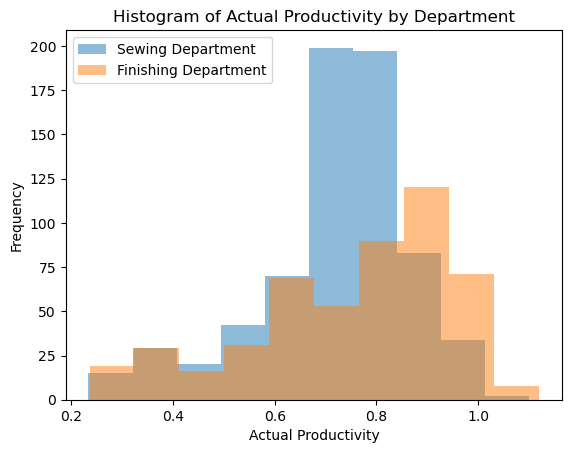

In [25]:
#5Mean and standard deviation of actual producivity for sewing and finishing Histogram plot of actual productivity
#based on both department and conclusion accordingly
# Filter the data for sewing and finishing departments
sewing_df = df[df['department'] == 'sewing']
finishing_df = df[df['department'] == 'finishing']

# Calculate the mean and standard deviation of actual productivity for sewing and finishing departments
sewing_mean = sewing_df['actual_productivity'].mean()
sewing_std = sewing_df['actual_productivity'].std()

finishing_mean = finishing_df['actual_productivity'].mean()
finishing_std = finishing_df['actual_productivity'].std()

print("Mean of Actual Productivity for Sewing Department:", sewing_mean)
print("Standard Deviation of Actual Productivity for Sewing Department:", sewing_std)
print("Mean of Actual Productivity for Finishing Department:", finishing_mean)
print("Standard Deviation of Actual Productivity for Finishing Department:", finishing_std)

# Plot histogram for actual productivity based on department
plt.hist(sewing_df['actual_productivity'], alpha=0.5, label='Sewing Department')
plt.hist(finishing_df['actual_productivity'], alpha=0.5, label='Finishing Department')
plt.xlabel('Actual Productivity')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram of Actual Productivity by Department')
plt.show()

In [26]:
#6 Number count for teams, smv across the year
# Calculate the number count for teams
team_counts = df['team'].value_counts()

# Calculate the number count for SMV
smv_counts = df['smv'].value_counts()

print("Number count for teams:")
print(team_counts)

print("\nNumber count for SMV:")
print(smv_counts)


Number count for teams:
8     109
2     109
1     105
4     105
9     104
10    100
12     99
7      96
3      95
6      94
5      93
11     88
Name: team, dtype: int64

Number count for SMV:
3.94     192
2.90     108
22.52    103
30.10     79
4.15      76
        ... 
48.68      1
54.56      1
41.19      1
49.10      1
40.99      1
Name: smv, Length: 70, dtype: int64


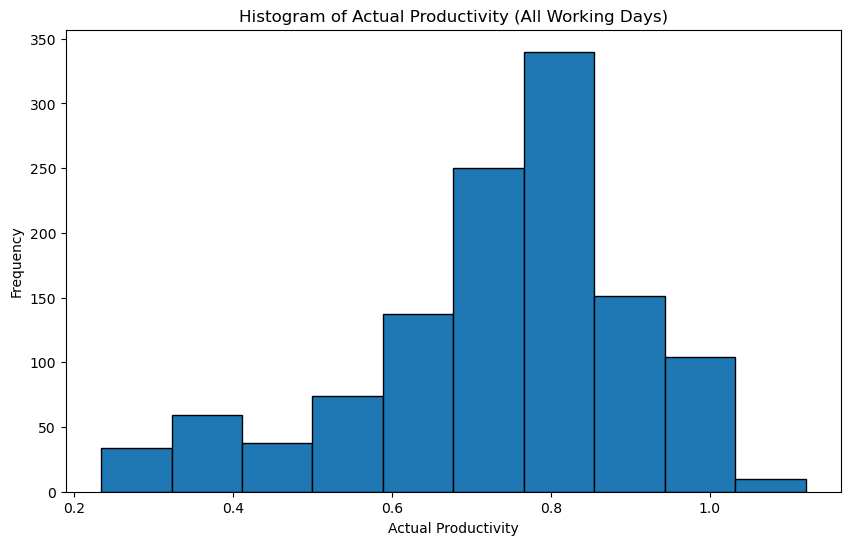

<Figure size 1000x600 with 0 Axes>

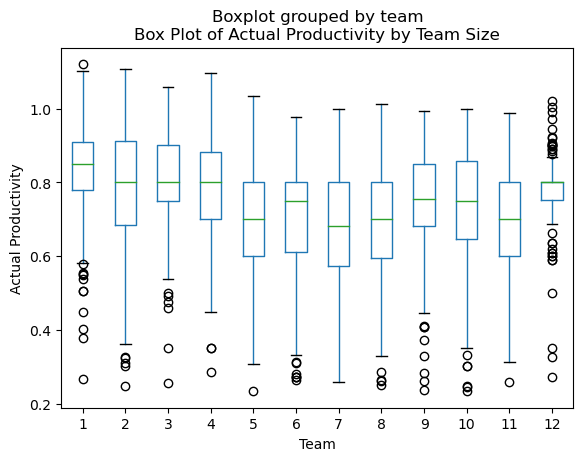

<Figure size 1000x600 with 0 Axes>

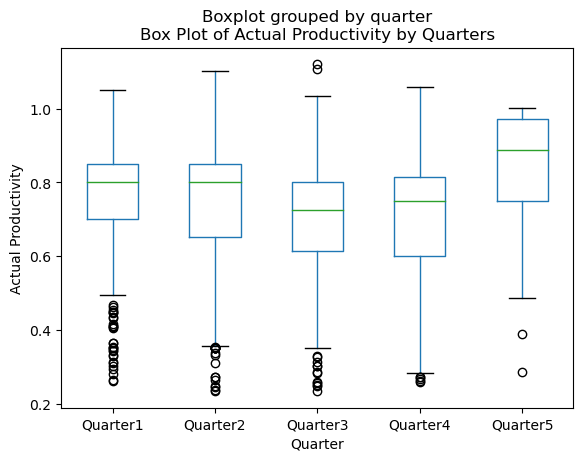

In [27]:
#7Histogram & Box plot of actual productivity based on all working days, team size, quarterts and Conclude accordingly
# Create a histogram of actual productivity based on all working days
plt.figure(figsize=(10, 6))
plt.hist(df['actual_productivity'], bins=10, edgecolor='black')
plt.xlabel('Actual Productivity')
plt.ylabel('Frequency')
plt.title('Histogram of Actual Productivity (All Working Days)')
plt.show()

# Create a box plot of actual productivity based on team size
plt.figure(figsize=(10, 6))
df.boxplot(column='actual_productivity', by='team', grid=False)
plt.xlabel('Team')
plt.ylabel('Actual Productivity')
plt.title('Box Plot of Actual Productivity by Team Size')
plt.show()

# Create a box plot of actual productivity based on quarters
plt.figure(figsize=(10, 6))
df.boxplot(column='actual_productivity', by='quarter', grid=False)
plt.xlabel('Quarter')
plt.ylabel('Actual Productivity')
plt.title('Box Plot of Actual Productivity by Quarters')
plt.show()

# Conclusions
# Based on the histogram, the distribution of actual productivity appears to be skewed towards lower values.
# The box plot of actual productivity by team size shows the distribution and spread of productivity for each team.
# The box plot of actual productivity by quarters allows comparing the productivity across different quarters.

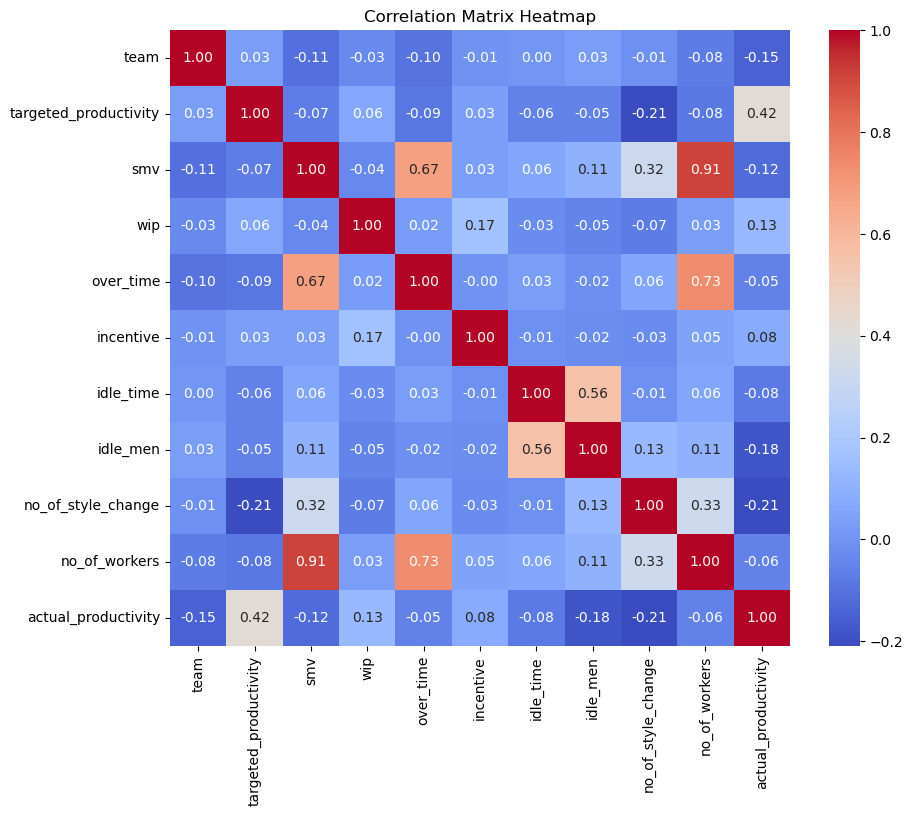

In [6]:
#8Find correlation matrix and draw heat map for all variables
df=pd.read_csv('garments_worker_productivity.csv')


correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')
       targeted_productivity    incentive  actual_productivity     over_time
count            1197.000000  1197.000000          1197.000000   1197.000000
mean                0.729632    38.210526             0.735091   4567.460317
std                 0.097891   160.182643             0.174488   3348.823563
min                 0.070000     0.000000             0.233705      0.000000
25%                 0.700000     0.000000             0.650307   1440.000000
50%                 0.750000     0.000000             0.773333   3960.000000
75%                 0.800000    50.000000             0.850253   6960.000000
max                 0.800000  3600.000000             1.120437  25920.000000
                       targeted_productivity  incentive  actual

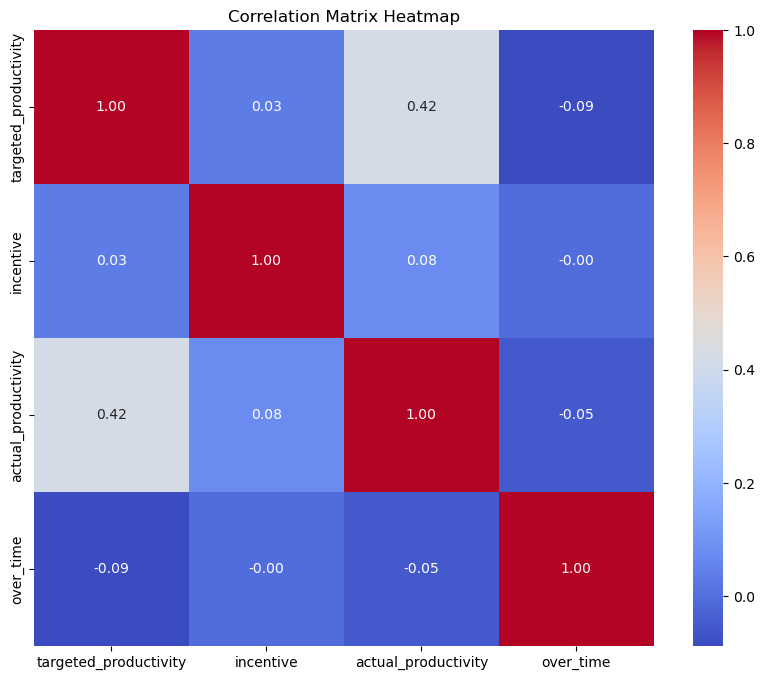

In [8]:
#9Conclude (Is the company able to meet target, are they giving incentives based on
#producitivity, does overtime have any effect on productivity)
print(df.columns)

# Check the basic summary statistics of the productivity and incentive variables
print(df[['targeted_productivity', 'incentive', 'actual_productivity', 'over_time']].describe())

# Check the correlation between productivity, incentive, and overtime
correlation_matrix = df[['targeted_productivity', 'incentive', 'actual_productivity', 'over_time']].corr()
print(correlation_matrix)

# Plot the heatmap of the correlation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()


conclusion :1.since the correlation between targeted productivity and actual productivity is 0.421594 
    which is positive we may conclude that the company may able to meet targets
    2.since correlation between incentives and actual productivity is only 0.08, the company may not give incentives based on 
    productivity.
    3. since correlation between overtime and actual productivity is -0.05, overtime may have an effect on productivity
    

In [10]:
#10Find the correlation between actual and target productivity for every quarter and for every department. What do you conclude
# Group the data by quarter and calculate correlation between actual and target productivity
correlation_by_quarter = df.groupby('quarter')['actual_productivity', 'targeted_productivity'].corr().iloc[0::2,-1].reset_index()

# Group the data by department and calculate correlation between actual and target productivity
correlation_by_department = df.groupby('department')['actual_productivity', 'targeted_productivity'].corr().iloc[0::2,-1].reset_index()

# Print the correlation for every quarter
print("Correlation between actual and target productivity for every quarter:")
print(correlation_by_quarter)

# Print the correlation for every department
print("\nCorrelation between actual and target productivity for every department:")
print(correlation_by_department)

C:\Users\shrut\AppData\Local\Temp\ipykernel_35948\1602593254.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  correlation_by_quarter = df.groupby('quarter')['actual_productivity', 'targeted_productivity'].corr().iloc[0::2,-1].reset_index()


Correlation between actual and target productivity for every quarter:
    quarter              level_1  targeted_productivity
0  Quarter1  actual_productivity               0.492779
1  Quarter2  actual_productivity               0.427164
2  Quarter3  actual_productivity               0.392637
3  Quarter4  actual_productivity               0.347594
4  Quarter5  actual_productivity               0.479972

Correlation between actual and target productivity for every department:
  department              level_1  targeted_productivity
0  finishing  actual_productivity                0.09751
1     sewing  actual_productivity                0.69797


C:\Users\shrut\AppData\Local\Temp\ipykernel_35948\1602593254.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  correlation_by_department = df.groupby('department')['actual_productivity', 'targeted_productivity'].corr().iloc[0::2,-1].reset_index()


conclusion:1) since correlation between Quarter 1 and targeted productivity is higher compare to other quarters
    we can conclude that in quarter1 generally able to achieve productivity levels that are close to the targets,
    but there is still room for improvement to further align actual productivity with the targets consistently.
    
 2) since sewing department has high correlation between actual and targeted productivity, we can conclude that
sewing department achieve productivity levels close to targets

In [ ]:
#11Based on the above details of EDA and Descriptive statisitcs analysis what would you say could be 
#the possible factors which can affect producitivity.

In [ ]:
 1.The department in which the employees work may have an impact on productivity. 
 2.The size of the team working on a particular task or project may influence productivity
 3.Quarter: The time of the year, represented by quarters, may also play a role in productivity.
Seasonal variations or changes in demand could influence how 
efficiently the tasks are completed during different quarters.
4.Targeted Productivity: The correlation analysis between actual and targeted productivity indicates that the company's
productivity goals could be a significant factor affecting actual productivity levels
5.Overtime: Overtime work might impact productivity. We observed that some instances have overtime hours, and 
it would be essential to analyze if overtime has a positive or negative effect on productivity.

Hypothesis Testing 

12. Test using Z test (take a random sample of more than 30 and assume sigma =.1) whether the finishing department has achieved more acheived producitivity than .75 for a standard deviation of .1. State your null and alternative hypothesis. alpha value is .05

13. Test using Z test(take a random sample of more than 30 and assume sigma =.1) whether the sewing department has achieved more producitivit than .75 for a standard deviation of .1. State your null and alternative hypothesis. alpha value is .05.

14. Conduct a two sample t test (take a random sample more than 30) to check whether the finishing department has achieved more actual productivtiy than sewing     department. State your null and alternative hypothesis 

15. Conduct a two sample t (take a random sample less than 30) test to check whether the finishing department has achieved obtained higher incentive than sewing department, state your null and alternative hypothesis. In case test fails for normality check, then take a sample more than 30. 

16. The manager has asked you to classifiy low productivity as less than .5, medium between .5 and less than .75 and higher
    as greater than or equal to .75. He believes that the percentage of  actual producvity  in  sewing departemnt for   
    person classified as low is 30%, for medium is 40% and for high is 30%. USing chi square test can you prove whether his 
    hypothesis is right or not 

17. Based on the EDA analysis the manager has decided to find out whether different quarters are having an impact on actual productivity. Assuming normality of data conduct an analysis accordingly Conduct an ANOVA for comparing productivity for Quarter1, Quarter2, Quarter3, Quarter 4 and accordingly conclude (Assume data is normally distributed)

18. Based on the EDA analysis the manager has decided to find out whether different days  are having an impact on actual productivity. Assuming normality of data conduct an analysis accordingly Conduct an ANOVA for comparing productivity for Quarter1, Quarter2, Quarter3, Quarter 4 and accordingly conclude (Assume data is normally distributed)

19. In case the manager is interested whether day and quarters have an impact on actual producitivity, provide an analysis and identify which factors play a role in affecting productivty

20. Based on 17 eliminate one of the variabes which is not significant and reconduct analysis using deparment as another variable, what do you conclude.

21. Based on EDA and Hypothesis would you aggree or disaggree with the finding, also in addition summarize the findings based on both analysis and provide a recommendation on what you can thinking on improving the producitivity. 


In [13]:
#12 Test using Z test (take a random sample of more than 30 and assume sigma =.1) whether the finishing department has achieved
# more actual producitivity than .75 for a standard deviation of .1. 
# State your null and alternative hypothesis. alpha value is .05
#Null hypothesis (H0): The mean productivity of the finishing department is equal to or less than 0.75.
#Alternative hypothesis (H1): The mean productivity of the finishing department is greater than 0.75.
xbar = df[df['department']== 'finishing']['actual_productivity'].mean()
sigma=0.1
alpha=0.05
mu=0.75
n=len(df[df['department'] == 'finishing'])
std_err = sigma/ np.sqrt(n)
z_stat= (xbar-mu)/std_err
z_crit = stats.norm.isf(alpha)
print(z_stat,z_crit)

0.6637364266641791 1.6448536269514729


INFERENCE: since z_critical>z_stat failed to reject Null hypothesis

In [ ]:
#13Test using Z test(take a random sample of more than 30 and assume sigma =.1)
#whether the sewing department has achieved more producitivit than .75 for a standard deviation of .1.
#State your null and alternative hypothesis. alpha value is .05

Null hypothesis (H0): The mean productivity of the sewing department is equal to or less than 0.75.
Alternative hypothesis (H1): The mean productivity of the sewing department is greater than 0.75.

In [14]:
xbar = df[df['department']== 'sewing']['actual_productivity'].mean()
sigma=0.1
alpha=0.05
mu=0.75
n=len(df[df['department'] == 'sewing'])
std_err = sigma/ np.sqrt(n)
z_stat= (xbar-mu)/std_err
z_crit = stats.norm.ppf(1-alpha)
print(z_stat,z_crit)

-7.3569004497644 1.6448536269514722


INFERENCE: since z_critical>z_stat failed to reject Null hypothesis

In [ ]:
#14 Conduct a two sample t test (take a random sample more than 30) to check whether the finishing department
#  has achieved more actual productivtiy than sewing department. 
#  State your null and alternative hypothesis

 The sample sizes for both departments should be more than 30, so the t-distribution can be reasonably
approximated by the normal distribution.

Test of Normality:
H0: pop data = Normal

H1: pop data != normal

In [16]:
stats.shapiro(df.actual_productivity)

ShapiroResult(statistic=0.943946361541748, pvalue=6.876279730732294e-21)

test of Normality : since the sample size >30 --> as per CLT it follows normal

test of variance Equalty :

H0: finishing_actual_productivity_ var = sewing_actual_productivity_ var

H1: finishing_actual_productivity_ var != sewing_actual_productivity_ var

In [18]:
finishing_dept=df[df['department'] == 'finishing']['actual_productivity']
sewing_dept=df[df['department'] == 'sewing']['actual_productivity']

In [19]:
## test of variance Equality ( levene test)

st.levene(finishing_dept, sewing_dept)

LeveneResult(statistic=42.14213973141611, pvalue=1.241332081072637e-10)

Null Hypothesis (H0): There is no significant difference in the mean actual productivity between the finishing and sewing departments.
    mu_finishing_department_actual productivity =mu_sewing_department_actualproductivity

Alternative Hypothesis (H1): The finishing department has achieved significantly more actual productivity than the sewing department. 
    mu_finishing_department_actual productivity >mu_sewing_department_actualproductivity

In [27]:
## two sample t test

finishing_dept=df[df['department'] == 'finishing']['actual_productivity']
sewing_dept=df[df['department'] == 'sewing']['actual_productivity']
alpha=0.05
stats.ttest_ind(finishing_dept,sewing_dept,equal_var=True)


Ttest_indResult(statistic=3.040752443283168, pvalue=0.0024112599776238385)

INFERENCE: since p value 0.0024 < alpha 0.05.reject Null hypothesis H0

In [1]:
#15  Conduct a two sample t (take a random sample less than 30) test to check  whether the finishing department has achieved
#   obtained higher incentive than sewing department, state your null and alternative hypothesis.
#   In case test fails for normality check, then take a sample more than 30.

H0: mu_finishing_department_incentive = mu_sewing_department_incentive
    H1:mu_finishing_department_incentive > mu_sewing_department_incentive

In [12]:
finishing_incentive = df[df['department'] == 'finishing']['incentive']
sewing_incentive = df[df['department'] == 'sewing']['incentive']
alpha=0.05
# Check the normality of the data using a normality test (e.g., Shapiro-Wilk test)
normality_test_finishing = stats.shapiro(finishing_incentive)
normality_test_sewing = stats.shapiro(sewing_incentive)
print('normality_test_finishing:', normality_test_finishing)
print('normality_test_sewing:', normality_test_sewing)

normality_test_finishing: ShapiroResult(statistic=0.10134845972061157, pvalue=2.14398665041697e-43)
normality_test_sewing: ShapiroResult(statistic=0.948691725730896, pvalue=9.404590719738499e-15)


since pvalue is less than 0.05 for both cases data is not normally distributed so take samples greater than 30

In [17]:
## taking sample more than 30

finishing_incentive = df[df['department'] == 'finishing'].sample(n=40, random_state=42)['incentive']
sewing_incentive = df[df['department'] == 'sewing'].sample(n=40, random_state=42)['incentive']

# Perform the two-sample t-test
t_statistic, p_value = stats.ttest_ind(finishing_incentive, sewing_incentive, equal_var=True)

print(t_statistic, p_value)

0.192855253958966 0.8475736019434311


INFERENCE: since p value 0.84 greater than alpha 0.05, failed to reject H0

In [3]:
#16 The manager has asked you to classifiy low productivity as less than .5, medium between .5 and less than .75 
# and higher as greater than or equal to .75. He believes that the percentage of actual producvity in sewing departemnt
# for person classified as low is 30%, for medium is 40% and for high is 30%. USing chi square test can you prove 
# whether his hypothesis is right or not

Null Hypothesis (H0): The distribution of actual productivity classes in the sewing department is as per the manager's hypothesis.
Alternative Hypothesis (H1): The distribution of actual productivity classes in the sewing department is not as per the manager's hypothesis.

In [4]:
# Classify actual productivity into low, medium, and high based on the given thresholds
df['productivity_class'] = pd.cut(df[df['department'] == 'sewing']['actual_productivity'], bins=[0, 0.5, 0.75, 1], labels=['low', 'medium', 'high'])

# Count the number of workers in each productivity class
observed_frequencies = df['productivity_class'].value_counts()

# Calculate the total number of workers
total_workers = len(df[df['department'] == 'sewing'])

# Calculate the expected frequencies based on the manager's hypothesis
expected_low = 0.3 * total_workers
expected_medium = 0.4 * total_workers
expected_high = 0.3 * total_workers

# Create the expected frequency table
expected_frequencies = pd.Series({'low': expected_low, 'medium': expected_medium, 'high': expected_high})

# Perform the chi-square test
chi2, p_value, dof, expected = stats.chi2_contingency([observed_frequencies, expected_frequencies])

print(chi2, p_value, dof, expected)

133.83463690286754 8.673169876985068e-30 2 [[292.65718497 237.73795136 135.60486367]
 [303.64281503 246.66204864 140.69513633]]


INFERENCE: since P value less than alpha 0.05 reject the null hypothesis H0

In [ ]:
#17 Based on the EDA analysis the manager has decided to find out whether different quarters are having an impact on
# actual productivity. Assuming normality of data conduct an analysis accordingly Conduct an ANOVA for comparing productivity 
# for Quarter1, Quarter2, Quarter3, Quarter 4 and accordingly conclude (Assume data is normally distributed) 

Null Hypothesis (H0): There is no significant difference in actual productivity among the quarters (all quarter means are equal).
Alternative Hypothesis (H1): There is a significant difference in actual productivity among the quarters (at least one quarter mean is different).

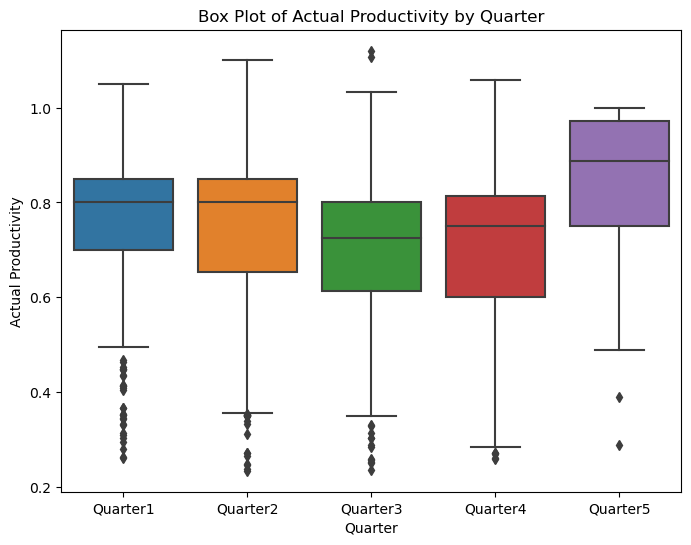

In [6]:
summary_stats = df.groupby('quarter')['actual_productivity'].describe()
plt.figure(figsize=(8, 6))
sns.boxplot(x='quarter', y='actual_productivity', data=df)
plt.title('Box Plot of Actual Productivity by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Actual Productivity')
plt.show()

In [9]:
# Perform one-way ANOVA to compare the actual productivity among the quarters
f_statistic, p_value = stats.f_oneway(df[df['quarter'] == 'Quarter1']['actual_productivity'],
                                   df[df['quarter'] == 'Quarter2']['actual_productivity'],
                                   df[df['quarter'] == 'Quarter3']['actual_productivity'],
                                   df[df['quarter'] == 'Quarter4']['actual_productivity'])

# Compare the p-value with the significance level (e.g., 0.05) for the ANOVA
alpha = 0.05
print(f_statistic, p_value)

5.274463802636486 0.0012927759459059219


INFERENCE:Since P_value is less than alpha 0.05 reject null hypothesis H0.

In [ ]:
#18 Based on the EDA analysis the manager has decided to find out whether different days are having an impact on 
 # actual productivity. Assuming normality of data conduct an analysis accordingly Conduct an ANOVA for comparing productivity 
 # for Quarter1, Quarter2, Quarter3, Quarter 4 and accordingly conclude (Assume data is normally distributed)


Null Hypothesis (H0): There is no significant difference in actual productivity based on the days of the week within each quarter (all day means are equal).
Alternative Hypothesis (H1): There is a significant difference in actual productivity based on the days of the week within each quarter (at least one day mean is different).

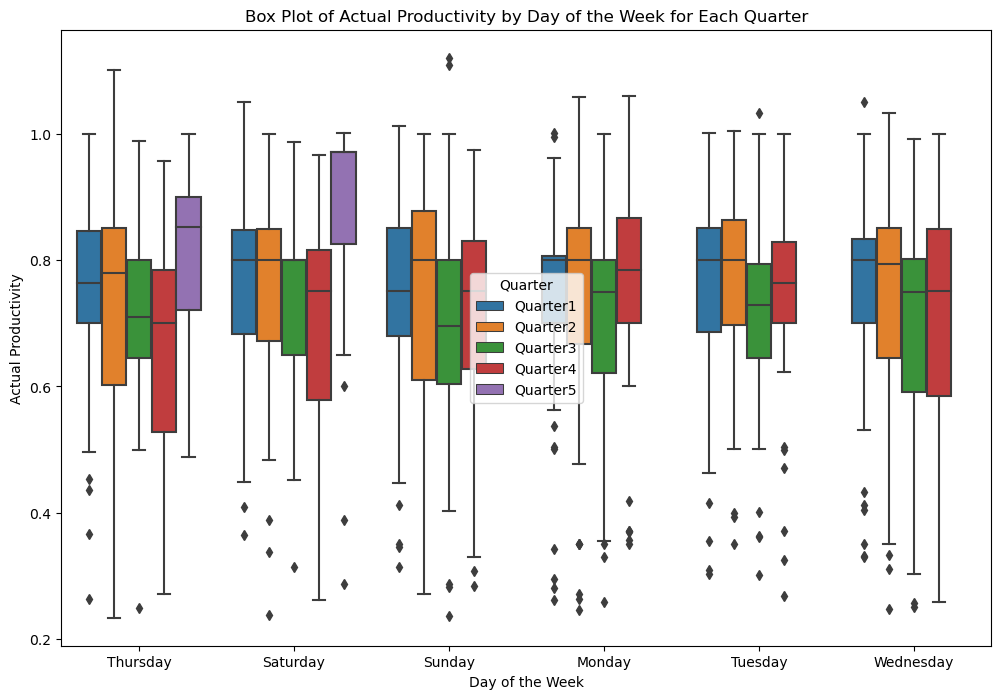

In [10]:
# Check the summary statistics of actual productivity for each day within each quarter
summary_stats = df.groupby(['quarter', 'day'])['actual_productivity'].describe()
alpha=0.05

# Visualize the distribution of actual productivity for each day within each quarter using box plots
plt.figure(figsize=(12, 8))
sns.boxplot(x='day', y='actual_productivity', hue='quarter', data=df)
plt.title('Box Plot of Actual Productivity by Day of the Week for Each Quarter')
plt.xlabel('Day of the Week')
plt.ylabel('Actual Productivity')
plt.legend(title='Quarter')
plt.show()

In [20]:
# Perform one-way ANOVA for each quarter to compare the actual productivity based on the days of the week
for quarter in df['quarter'].unique():
    quarter_data = df[df['quarter'] == quarter]['actual_productivity']
    day_data = df[df['quarter'] == quarter]['day']
    f_statistic, p_value = stats.f_oneway(
        quarter_data[day_data == 'Monday'],
        quarter_data[day_data == 'Tuesday'],
        quarter_data[day_data == 'Wednesday'],
        quarter_data[day_data == 'Thursday'],
        quarter_data[day_data == 'Friday'],
        quarter_data[day_data == 'Saturday'],
        quarter_data[day_data == 'Sunday']
    )
        
 # Compare the p-value with the significance level (e.g., 0.05) for the ANOVA
    alpha = 0.05
    if p_value < alpha:
        print(f"Reject the null hypothesis for Quarter {quarter}. There is a significant difference in actual productivity based on the days of the week.")
    else:
        print(f"Fail to reject the null hypothesis for Quarter {quarter}. There is no significant difference in actual productivity based on the days of the week.")     


Fail to reject the null hypothesis for Quarter Quarter1. There is no significant difference in actual productivity based on the days of the week.
Fail to reject the null hypothesis for Quarter Quarter2. There is no significant difference in actual productivity based on the days of the week.
Fail to reject the null hypothesis for Quarter Quarter3. There is no significant difference in actual productivity based on the days of the week.
Fail to reject the null hypothesis for Quarter Quarter4. There is no significant difference in actual productivity based on the days of the week.
Fail to reject the null hypothesis for Quarter Quarter5. There is no significant difference in actual productivity based on the days of the week.


In [1]:
# 19 In case the manager is interested whether day and quarters have an impact on actual producitivity, 
# provide an analysis and identify which factors play a role in affecting productivtymean).

Null Hypothesis (H0): There is no interaction effect between day and quarter on actual productivity (all day and quarter means are equal).
Alternative Hypothesis (H1): There is an interaction effect between day and quarter on actual productivity (at least one day and quarter combination has a different mean).

In [7]:
model = ols('actual_productivity ~ C(day) + C(quarter) + C(day):C(quarter)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)
alpha = 0.05
if anova_table['PR(>F)'][3] < alpha:
    print("Reject the null hypothesis. There is a significant interaction effect between day and quarter on actual productivity.")
else:
    print("Fail to reject the null hypothesis. There is no significant interaction effect between day and quarter on actual productivity.")

                      sum_sq      df         F    PR(>F)
C(day)              0.116280     5.0  0.773131  0.461801
C(quarter)          0.342276     4.0  2.844694  0.091942
C(day):C(quarter)   0.557592    20.0  0.926841  0.541534
Residual           35.223959  1171.0       NaN       NaN
Fail to reject the null hypothesis. There is no significant interaction effect between day and quarter on actual productivity.


C:\Users\shrut\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\shrut\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\shrut\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 20, but rank is 17
  warnings.warn('covariance of constraints does not have full '


In [ ]:
# 20 Based on 17 eliminate one of the variabes which is not significant and reconduct analysis using deparment as 
#    another variable, what do you conclude.


Null Hypothesis (H0): There is no significant interaction effect between quarter and department on actual productivity.
Alternative Hypothesis (H1): There is a significant interaction effect between quarter and department on actual productivity.

In [9]:
result = stats.f_oneway(df.loc[(df['quarter'] == 'Quarter1') & (df['department'] == 'sewing'), 'actual_productivity'],
                     df.loc[(df['quarter'] == 'Quarter2') & (df['department'] == 'sewing'), 'actual_productivity'],
                     df.loc[(df['quarter'] == 'Quarter3') & (df['department'] == 'sewing'), 'actual_productivity'],
                     df.loc[(df['quarter'] == 'Quarter4') & (df['department'] == 'sewing'), 'actual_productivity'],
                     df.loc[(df['quarter'] == 'Quarter1') & (df['department'] == 'finishing'), 'actual_productivity'],
                     df.loc[(df['quarter'] == 'Quarter2') & (df['department'] == 'finishing'), 'actual_productivity'],
                     df.loc[(df['quarter'] == 'Quarter3') & (df['department'] == 'finishing'), 'actual_productivity'],
                     df.loc[(df['quarter'] == 'Quarter4') & (df['department'] == 'finishing'), 'actual_productivity'])

# Extract the p-value from the two-way ANOVA result
p_value = result.pvalue

# Compare the p-value with the significance level (e.g., 0.05)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant interaction effect between quarter and department on actual productivity.")
else:
    print("Fail to reject the null hypothesis. There is no significant interaction effect between quarter and department on actual productivity.")

Reject the null hypothesis. There is a significant interaction effect between quarter and department on actual productivity.


In [ ]:
# 21 Based on EDA and Hypothesis would you aggree or disaggree with the finding, also in addition summarize the findings based on both analysis and provide a recommendation on what you can thinking on 
# improving the producitivity.

Summary of Findings:

The company's actual productivity is positively correlated with targeted productivity, but it is not solely determined by the targets.
The productivity of different departments may vary significantly, and identifying the reasons behind these differences can lead to targeted improvement strategies.
The analysis of quarters may reveal seasonal patterns or trends that affect productivity, allowing the company to adjust its strategies accordingly.
The impact of overtime and incentives on productivity will provide insights into their effectiveness and inform decision-making on how to best incentivize employees.
Recommendation for Improving Productivity:
Based on the analysis, the company can consider the following recommendations to improve productivity:

Departmental Analysis: Identify the factors that contribute to the variation in productivity between the sewing and finishing departments. This analysis can include an assessment of workflow processes, resource allocation, and training opportunities.

Seasonal Planning: Analyze the impact of different quarters on productivity to anticipate potential challenges and allocate resources effectively during peak and off-peak periods.

Incentive Structure: Evaluate the effectiveness of the current incentive structure and consider aligning it with specific productivity goals. This can motivate employees and help achieve targets more consistently.

Training and Skill Development: Invest in training programs to enhance employee